In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

In [ ]:
data = pd.read_csv('/content/campaign_responses.csv')

In [ ]:
# Handle missing values and encode categorical variables
data = data.dropna()
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [ ]:
# Define features (X) and target variable (y)
X = data.drop(columns=['responded'])
y = data['responded']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
models

{'Logistic Regression': LogisticRegression(random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Support Vector Machine': SVC(probability=True, random_state=42),
 'K-Nearest Neighbors': KNeighborsClassifier()}

In [ ]:
for i in models:
  print(models[i])
  y_pred = models[i].predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for {i}: {accuracy}")



LogisticRegression(random_state=42)
Accuracy for Logistic Regression: 1.0
DecisionTreeClassifier(random_state=42)
Accuracy for Decision Tree: 0.8333333333333334
RandomForestClassifier(random_state=42)
Accuracy for Random Forest: 0.9166666666666666
GradientBoostingClassifier(random_state=42)
Accuracy for Gradient Boosting: 1.0
SVC(probability=True, random_state=42)
Accuracy for Support Vector Machine: 1.0
KNeighborsClassifier()
Accuracy for K-Nearest Neighbors: 1.0


In [ ]:
# Train models and evaluate
accuracy_results = {}
roc_auc_results = {}
roc_curves = {}

In [ ]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    # Calculate ROC-AUC
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc_results[name] = roc_auc

        # Compute ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_curves[name] = (fpr, tpr)

        # for name, model in models.items():
        print(f"ROC Curve for {name}:")
        for i in range(len(fpr)):
            print(f"FPR = {fpr[i]}, TPR = {tpr[i]}")
            print("\n")

ROC Curve for Logistic Regression:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 0.14285714285714285


FPR = 0.0, TPR = 1.0


FPR = 1.0, TPR = 1.0


ROC Curve for Decision Tree:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 0.7142857142857143


FPR = 1.0, TPR = 1.0


ROC Curve for Random Forest:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 0.7142857142857143


FPR = 0.0, TPR = 1.0


FPR = 1.0, TPR = 1.0


ROC Curve for Gradient Boosting:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 0.7142857142857143


FPR = 0.0, TPR = 1.0


FPR = 1.0, TPR = 1.0


ROC Curve for Support Vector Machine:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 0.14285714285714285


FPR = 0.0, TPR = 1.0


FPR = 1.0, TPR = 1.0


ROC Curve for K-Nearest Neighbors:
FPR = 0.0, TPR = 0.0


FPR = 0.0, TPR = 1.0


FPR = 1.0, TPR = 1.0




In [ ]:
fpr

array([0., 0., 1.])

In [ ]:
tpr

array([0., 1., 1.])

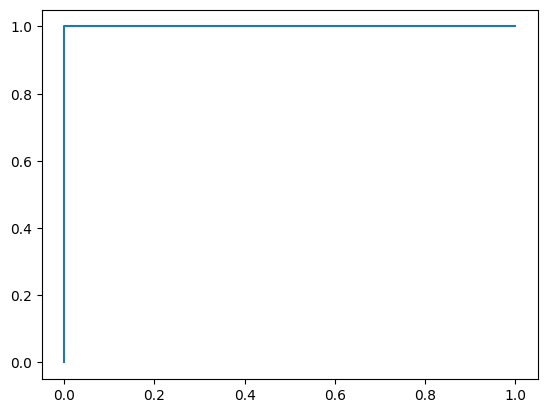

In [ ]:
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

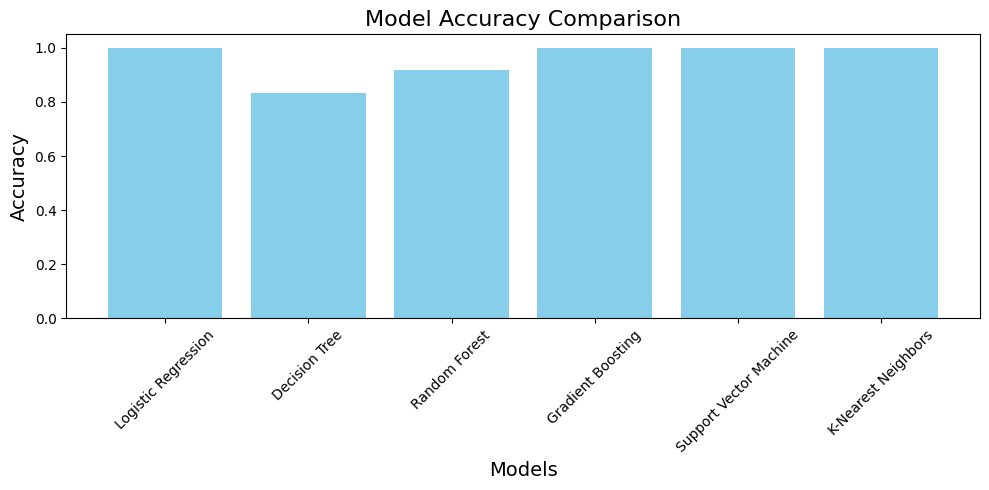

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

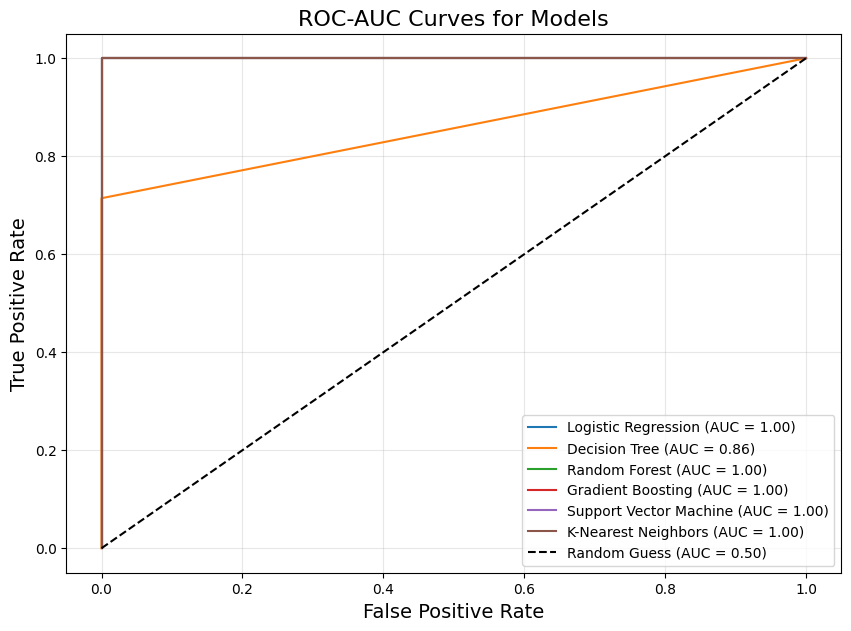

In [ ]:
# Plot ROC-AUC Curves
plt.figure(figsize=(10, 7))
for name, (fpr, tpr) in roc_curves.items():
    roc_auc = roc_auc_results.get(name, None)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.title('ROC-AUC Curves for Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()